# Joint Interpretation of TDEM and Seismic Refraction Data

In this lab, we'll explore how to use seismic refraction results to guide the initial model for Time Domain Electromagnetic (TDEM) inversion. This process helps us create a more accurate subsurface model by combining information from two different geophysical methods.

### Part 1: Loads the seismic and TDEM inversion results

First, let's load the seismic refraction inversion and TDEM results and examine the data together.

In [1]:
import sys
import os

os.chdir("/Users/winniechu/Documents/Teaching/Geophysics/2024/lab/lab4-tdem-refraction")
sys.path.insert(0, os.getcwd())

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load seismic inversion results
seismic_data = np.load("seismic_inversion_results.npz")
seismic_velocities = seismic_data["velocities"]
seismic_thicknesses = seismic_data["thicknesses"]
seismic_depths = np.cumsum(seismic_thicknesses)

In [3]:
# Load TDEM inversion results
tdem_data = np.load("tdem_inversion_results.npz")
tdem_resistivities = tdem_data["resistivities"]
tdem_thicknesses = tdem_data["thicknesses"]
tdem_depths = np.cumsum(tdem_thicknesses)

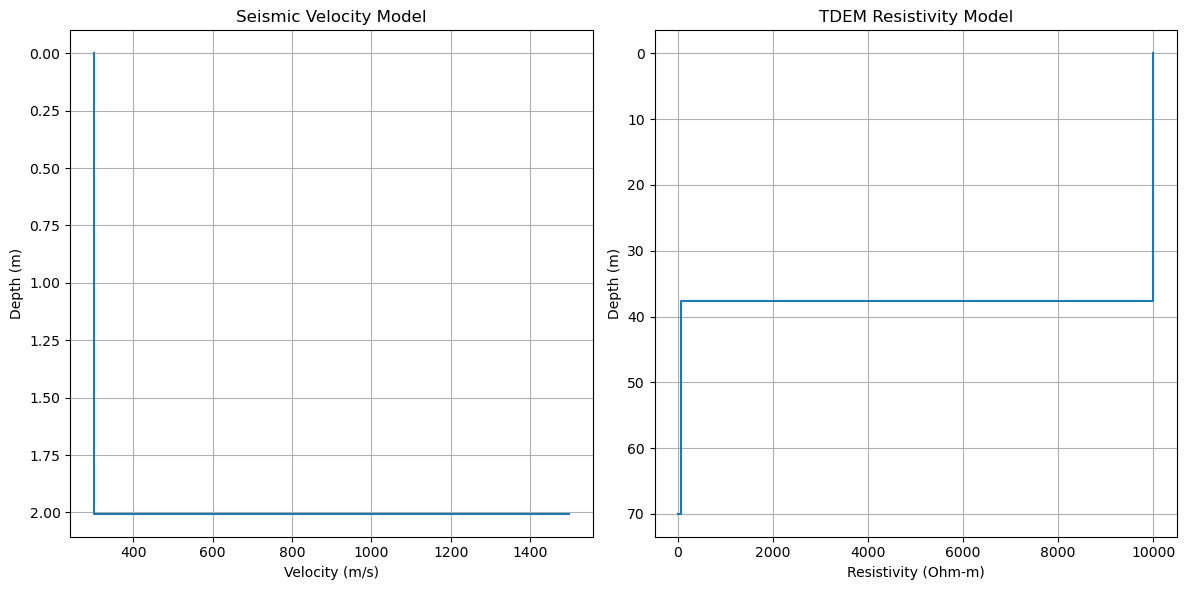

In [4]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot seismic velocity model
ax1.step(seismic_velocities, np.r_[0, seismic_depths], where="pre", label="Velocity")
ax1.set_xlabel("Velocity (m/s)")
ax1.set_ylabel("Depth (m)")
ax1.set_title("Seismic Velocity Model")
ax1.invert_yaxis()
ax1.grid(True)

# Plot TDEM resistivity model
ax2.step(tdem_resistivities, np.r_[0, tdem_depths], where="pre", label="Resistivity")
ax2.set_xlabel("Resistivity (Ohm-m)")
ax2.set_ylabel("Depth (m)")
ax2.set_title("TDEM Resistivity Model")
ax2.invert_yaxis()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Print layer information
print("Seismic Model:")
for i, (v, t) in enumerate(zip(seismic_velocities, seismic_thicknesses)):
    print(f"Layer {i+1}: Velocity = {v:.0f} m/s, Thickness = {t:.2f} m")

print("\nTDEM Model:")
for i, (r, t) in enumerate(zip(tdem_resistivities, tdem_thicknesses)):
    print(f"Layer {i+1}: Resistivity = {r:.2f} Ohm-m, Thickness = {t:.2f} m")

Seismic Model:
Layer 1: Velocity = 301 m/s, Thickness = 2.01 m

TDEM Model:
Layer 1: Resistivity = 10000.00 Ohm-m, Thickness = 37.69 m
Layer 2: Resistivity = 58.35 Ohm-m, Thickness = 32.26 m


In [6]:
# Calculate and print the correlation coefficient between velocity and resistivity
min_layers = min(len(seismic_velocities), len(tdem_resistivities))
correlation = np.corrcoef(
    seismic_velocities[:min_layers], tdem_resistivities[:min_layers]
)[0, 1]
print(f"\nCorrelation coefficient between velocity and resistivity: {correlation:.2f}")


Correlation coefficient between velocity and resistivity: -1.00


In [7]:
# Joint interpretation analysis
print("\nJoint Interpretation Analysis:")
for i in range(min_layers):
    print(f"\nLayer {i+1}:")
    print(f"  Velocity: {seismic_velocities[i]:.0f} m/s")
    print(f"  Resistivity: {tdem_resistivities[i]:.2f} Ohm-m")

    if seismic_velocities[i] < 1500 and tdem_resistivities[i] < 100:
        print("  Interpretation: Possible clay or saturated sediment layer")
    elif seismic_velocities[i] > 3000 and tdem_resistivities[i] > 1000:
        print("  Interpretation: Possible bedrock or consolidated rock")
    else:
        print(
            "  Interpretation: Intermediate layer, possibly partially saturated sediments or weathered rock"
        )



Joint Interpretation Analysis:

Layer 1:
  Velocity: 301 m/s
  Resistivity: 10000.00 Ohm-m
  Interpretation: Intermediate layer, possibly partially saturated sediments or weathered rock

Layer 2:
  Velocity: 1497 m/s
  Resistivity: 58.35 Ohm-m
  Interpretation: Possible clay or saturated sediment layer
